## Import Dependencies

In [3]:
#data preprocessing
import pandas as pd

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from IPython.display import display
%matplotlib inline

In [4]:
# Read data and drop redundant column.
data = pd.read_csv('final_dataset.csv')

# Preview data.
display(data.head())


# Keys for Dataframe
# Div = League Division
# Date = Match Date
# HomeTeam = Home Team
# AwayTeam = Away Team
# FTHG = Full Time Home Team Goals
# FTAG = Full Time Away Team Goals
# FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
# HTHG = Half Time Home Team Goals
# HTAG = Half Time Away Team Goals
# HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)
# Referee = Match Referee
# HS = Home Team Shots
# AS = Away Team Shots
# HST = Home Team Shots on Target
# AST = Away Team Shots on Target
# HF = Home Team Fouls Committed
# AF = Away Team Fouls Committed
# HC = Home Team Corners
# AC = Away Team Corners
# HY = Home Team Yellow Cards
# AY = Away Team Yellow Cards
# HR = Home Team Red Cards
# AR = Away Team Red Cards
# B365H = Bet365 home win odds
# B365D = Bet365 draw odds
# B365A = Bet365 away win odds
# VCH = VC Bet home win odds
# VCD = VC Bet draw odds
# VCA = VC Bet away win odds


,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HY,AY,HR,AR,B365H,B365D,B365A,VCH,VCD,VCA
0,0,E0,2007-08-11,Aston Villa,Liverpool,1,2,A,0,1,...,4,2,0,0,4.00,3.25,1.90,3.5,3.20,2.00
1,1,E0,2007-08-11,Bolton,Newcastle,1,3,A,0,3,...,1,1,0,0,2.50,3.20,2.75,2.3,3.25,2.90
2,2,E0,2007-08-11,Derby,Portsmouth,2,2,D,1,1,...,1,2,0,0,2.80,3.25,2.40,2.7,3.25,2.40
3,3,E0,2007-08-11,Everton,Wigan,2,1,H,1,0,...,0,0,0,0,1.66,3.40,5.50,1.7,3.40,5.00
4,4,E0,2007-08-11,Middlesbrough,Blackburn,1,2,A,1,0,...,3,4,0,0,2.37,3.25,2.87,2.5,3.25,2.65


array([[<AxesSubplot:xlabel='FTHG', ylabel='FTHG'>,
        <AxesSubplot:xlabel='FTAG', ylabel='FTHG'>,
        <AxesSubplot:xlabel='AS', ylabel='FTHG'>,
        <AxesSubplot:xlabel='HS', ylabel='FTHG'>,
        <AxesSubplot:xlabel='HST', ylabel='FTHG'>,
        <AxesSubplot:xlabel='AST', ylabel='FTHG'>,
        <AxesSubplot:xlabel='HF', ylabel='FTHG'>,
        <AxesSubplot:xlabel='AF', ylabel='FTHG'>,
        <AxesSubplot:xlabel='HC', ylabel='FTHG'>,
        <AxesSubplot:xlabel='AC', ylabel='FTHG'>,
        <AxesSubplot:xlabel='HY', ylabel='FTHG'>,
        <AxesSubplot:xlabel='AY', ylabel='FTHG'>,
        <AxesSubplot:xlabel='HR', ylabel='FTHG'>,
        <AxesSubplot:xlabel='AR', ylabel='FTHG'>],
       [<AxesSubplot:xlabel='FTHG', ylabel='FTAG'>,
        <AxesSubplot:xlabel='FTAG', ylabel='FTAG'>,
        <AxesSubplot:xlabel='AS', ylabel='FTAG'>,
        <AxesSubplot:xlabel='HS', ylabel='FTAG'>,
        <AxesSubplot:xlabel='HST', ylabel='FTAG'>,
        <AxesSubplot:xlabel='AST', yla

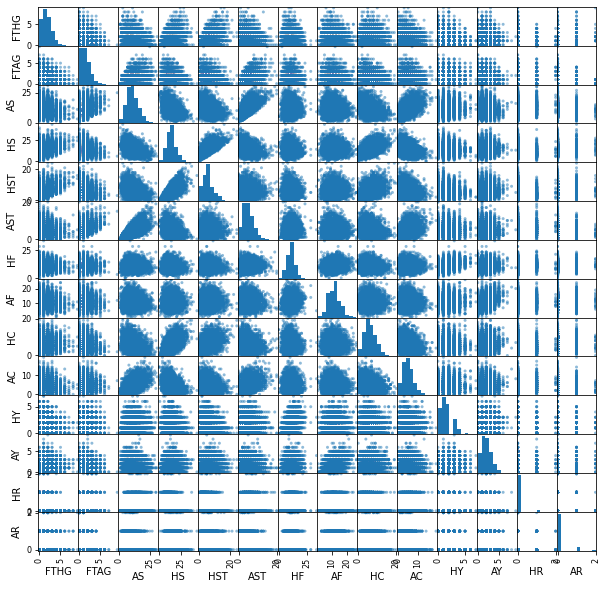

In [5]:
# Visualising distribution of data
from pandas.plotting import scatter_matrix

#the scatter matrix is plotting each of the columns specified against each other column.
#You would have observed that the diagonal graph is defined as a histogram, which means that in the 
#section of the plot matrix where the variable is against itself, a histogram is plotted.

#Scatter plots show how much one variable is affected by another. 
#The relationship between two variables is called their correlation
#negative vs positive correlation


scatter_matrix(data[['FTR','FTHG','FTAG','AS','HS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']], figsize=(10,10))

 


## Data Exploration

In [6]:
#what is the win rate for the home team?

# Total number of matches.
n_matches = data.shape[0]

# Calculate number of features. -1 because we are saving one as the target variable (win/lose/draw)
n_features = data.shape[1] - 1

# Calculate matches won by home team.
n_homewins = len(data[data.FTR == 'H'])

# Calculate win rate for home team.
win_rate = (float(n_homewins) / (n_matches)) * 100

# Print the results
print ("Total number of matches: {}".format(n_matches))
print ("Number of features: {}".format(n_features))
print ("Number of matches won by home team: {}".format(n_homewins))
print ("Win rate of home team: {:.2f}%".format(win_rate))

Total number of matches: 5700
Number of features: 29
Number of matches won by home team: 2594
Win rate of home team: 45.51%


## Preparing the Data

In [7]:
data.drop(data.columns[[0, 1, 2, 11]], axis=1, inplace=True)

# Keys for Dataframe
# Div = League Division
# Date = Match Date
# HomeTeam = Home Team
# AwayTeam = Away Team
data

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,HY,AY,HR,AR,B365H,B365D,B365A,VCH,VCD,VCA
0,Aston Villa,Liverpool,1,2,A,0,1,A,10,17,...,4,2,0,0,4.00,3.25,1.90,3.50,3.20,2.00
1,Bolton,Newcastle,1,3,A,0,3,A,13,7,...,1,1,0,0,2.50,3.20,2.75,2.30,3.25,2.90
2,Derby,Portsmouth,2,2,D,1,1,D,12,12,...,1,2,0,0,2.80,3.25,2.40,2.70,3.25,2.40
3,Everton,Wigan,2,1,H,1,0,H,12,14,...,0,0,0,0,1.66,3.40,5.50,1.70,3.40,5.00
4,Middlesbrough,Blackburn,1,2,A,1,0,H,10,4,...,3,4,0,0,2.37,3.25,2.87,2.50,3.25,2.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,Crystal Palace,Man United,1,0,H,1,0,H,6,10,...,2,4,0,0,3.00,3.60,2.25,3.00,3.50,2.20
5696,Leicester,Southampton,4,1,H,0,0,D,12,7,...,0,1,0,0,1.85,4.00,3.80,1.83,3.80,3.80
5697,Liverpool,Wolves,3,1,H,1,1,D,29,7,...,1,0,0,0,1.14,8.50,15.00,1.13,8.00,19.00
5698,Man City,Aston Villa,3,2,H,0,1,A,24,4,...,0,1,0,0,1.16,8.00,17.00,1.13,7.50,18.00


In [8]:
# Changing FTR to numbers
data.loc[data['FTR'] == 'H', 'FTR'] = 0
data.loc[data['FTR'] == 'D', 'FTR'] = 1
data.loc[data['FTR'] == 'A', 'FTR'] = 1

data.loc[data['HTR'] == 'H', 'HTR'] = 0
data.loc[data['HTR'] == 'D', 'HTR'] = 1
data.loc[data['HTR'] == 'A', 'HTR'] = 1

data['HTR'] = data['HTR'].astype(int)
data['FTR'] = data['FTR'].astype(int)
data

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,HY,AY,HR,AR,B365H,B365D,B365A,VCH,VCD,VCA
0,Aston Villa,Liverpool,1,2,1,0,1,1,10,17,...,4,2,0,0,4.00,3.25,1.90,3.50,3.20,2.00
1,Bolton,Newcastle,1,3,1,0,3,1,13,7,...,1,1,0,0,2.50,3.20,2.75,2.30,3.25,2.90
2,Derby,Portsmouth,2,2,1,1,1,1,12,12,...,1,2,0,0,2.80,3.25,2.40,2.70,3.25,2.40
3,Everton,Wigan,2,1,0,1,0,0,12,14,...,0,0,0,0,1.66,3.40,5.50,1.70,3.40,5.00
4,Middlesbrough,Blackburn,1,2,1,1,0,0,10,4,...,3,4,0,0,2.37,3.25,2.87,2.50,3.25,2.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,Crystal Palace,Man United,1,0,0,1,0,0,6,10,...,2,4,0,0,3.00,3.60,2.25,3.00,3.50,2.20
5696,Leicester,Southampton,4,1,0,0,0,1,12,7,...,0,1,0,0,1.85,4.00,3.80,1.83,3.80,3.80
5697,Liverpool,Wolves,3,1,0,1,1,1,29,7,...,1,0,0,0,1.14,8.50,15.00,1.13,8.00,19.00
5698,Man City,Aston Villa,3,2,0,0,1,1,24,4,...,0,1,0,0,1.16,8.00,17.00,1.13,7.50,18.00


In [9]:
data['HomeTeam'].unique()

array(['Aston Villa', 'Bolton', 'Derby', 'Everton', 'Middlesbrough',
       'Sunderland', 'West Ham', 'Arsenal', 'Chelsea', 'Man United',
       'Tottenham', 'Birmingham', 'Fulham', 'Man City', 'Portsmouth',
       'Reading', 'Wigan', 'Newcastle', 'Blackburn', 'Liverpool', 'Hull',
       'Stoke', 'West Brom', 'Wolves', 'Burnley', 'Blackpool', 'QPR',
       'Swansea', 'Norwich', 'Southampton', 'Crystal Palace', 'Cardiff',
       'Leicester', 'Bournemouth', 'Watford', 'Huddersfield', 'Brighton',
       'Sheffield United', 'Leeds', 'Brentford'], dtype=object)

In [10]:
Team_dict ={'Aston Villa': 0, 'Bolton': 1,'Derby': 2,'Everton': 3,'Middlesbrough': 4,'Sunderland': 5,
            'West Ham': 6,'Arsenal': 7, 'Chelsea': 8, 'Man United': 9, 'Tottenham': 10, 'Birmingham': 11,'Fulham': 12,
            'Man City': 13, 'Portsmouth': 14, 'Reading': 15, 'Wigan': 16, 'Newcastle': 17, 'Blackburn': 18, 
            'Liverpool': 19, 'Hull': 20, 'Stoke': 21, 'West Brom': 22, 'Wolves': 23, 'Burnley': 24, 'Blackpool': 25, 
            'QPR': 26, 'Swansea': 27, 'Norwich': 28, 'Southampton': 29, 'Crystal Palace': 30,  'Cardiff': 31,
            'Leicester': 32, 'Bournemouth': 33, 'Watford': 34,  'Huddersfield': 35, 'Brighton': 36,'Sheffield United': 37, 
            'Leeds': 38, 'Brentford': 39}
data = data.replace({'HomeTeam': Team_dict})
data = data.replace({'AwayTeam': Team_dict})
data


,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,HY,AY,HR,AR,B365H,B365D,B365A,VCH,VCD,VCA
0,0,19,1,2,1,0,1,1,10,17,...,4,2,0,0,4.00,3.25,1.90,3.50,3.20,2.00
1,1,17,1,3,1,0,3,1,13,7,...,1,1,0,0,2.50,3.20,2.75,2.30,3.25,2.90
2,2,14,2,2,1,1,1,1,12,12,...,1,2,0,0,2.80,3.25,2.40,2.70,3.25,2.40
3,3,16,2,1,0,1,0,0,12,14,...,0,0,0,0,1.66,3.40,5.50,1.70,3.40,5.00
4,4,18,1,2,1,1,0,0,10,4,...,3,4,0,0,2.37,3.25,2.87,2.50,3.25,2.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,30,9,1,0,0,1,0,0,6,10,...,2,4,0,0,3.00,3.60,2.25,3.00,3.50,2.20
5696,32,29,4,1,0,0,0,1,12,7,...,0,1,0,0,1.85,4.00,3.80,1.83,3.80,3.80
5697,19,23,3,1,0,1,1,1,29,7,...,1,0,0,0,1.14,8.50,15.00,1.13,8.00,19.00
5698,13,0,3,2,0,0,1,1,24,4,...,0,1,0,0,1.16,8.00,17.00,1.13,7.50,18.00


In [11]:
pd.set_option('display.max_columns', None)
data.dtypes

HomeTeam      int64
AwayTeam      int64
FTHG          int64
FTAG          int64
FTR           int32
HTHG          int64
HTAG          int64
HTR           int32
HS            int64
AS            int64
HST           int64
AST           int64
HF            int64
AF            int64
HC            int64
AC            int64
HY            int64
AY            int64
HR            int64
AR            int64
B365H       float64
B365D       float64
B365A       float64
VCH         float64
VCD         float64
VCA         float64
dtype: object

In [12]:
data.columns

Index(['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR',
       'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR',
       'AR', 'B365H', 'B365D', 'B365A', 'VCH', 'VCD', 'VCA'],
      dtype='object')

In [13]:
data = data[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR',
       'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR',
       'AR']]
data

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0,19,1,2,1,0,1,1,10,17,6,7,18,11,4,2,4,2,0,0
1,1,17,1,3,1,0,3,1,13,7,9,5,15,16,4,3,1,1,0,0
2,2,14,2,2,1,1,1,1,12,12,5,6,14,17,6,6,1,2,0,0
3,3,16,2,1,0,1,0,0,12,14,8,4,8,13,6,2,0,0,0,0
4,4,18,1,2,1,1,0,0,10,4,6,4,16,16,13,3,3,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,30,9,1,0,0,1,0,0,6,10,3,4,12,22,3,6,2,4,0,0
5696,32,29,4,1,0,0,0,1,12,7,6,2,10,5,3,3,0,1,0,0
5697,19,23,3,1,0,1,1,1,29,7,8,5,6,3,5,3,1,0,0,0
5698,13,0,3,2,0,0,1,1,24,4,5,2,5,11,13,1,0,1,0,0


Modeling the Data

In [14]:
# Split our preprocessed data into our features and target arrays
y = data["FTR"].values
X = data.drop(["FTR"],1).values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

C:\Users\dannyv\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
# Preprocess numerical data for neural network

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train_scaled,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.856


In [17]:
# Instantiate a linear SVM model
from sklearn.svm import SVC
model = SVC(kernel='linear')

# Fit the data
model.fit(X_train, y_train)

SVC(kernel='linear')

In [18]:
# Make predictions using the test data
y_pred = model.predict(X_test)
results = pd.DataFrame({
    "Prediction": y_pred, 
    "Actual": y_test
}).reset_index(drop=True)
results.head(15)

,Prediction,Actual
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,0,0
9,1,1


In [19]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=200, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.996


In [55]:
from sklearn.tree import export_text

print(export_text(rf_model.estimators_[2], 
                  spacing=3, decimals=3))


|--- feature_3 <= 0.266
|   |--- feature_4 <= -0.221
|   |   |--- feature_2 <= -0.785
|   |   |   |--- class: 1.0
|   |   |--- feature_2 >  -0.785
|   |   |   |--- feature_8 <= -0.344
|   |   |   |   |--- feature_3 <= -0.590
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_3 >  -0.590
|   |   |   |   |   |--- feature_14 <= 1.350
|   |   |   |   |   |   |--- feature_12 <= -1.256
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- feature_12 >  -1.256
|   |   |   |   |   |   |   |--- feature_8 <= -0.557
|   |   |   |   |   |   |   |   |--- feature_14 <= -1.201
|   |   |   |   |   |   |   |   |   |--- feature_15 <= 1.685
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 1.551
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  1.551
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- feature_15 >  1.685
|   |   |  